In [1]:
import numpy as np

import h5py
from fy3_mersi_l0 import Fy3MersiReader, FY3E_CONFIG, get_info, get_all_blocks_by_name, get_data_by_name, Hdf5Converter

In [2]:
reader = Fy3MersiReader(FY3E_CONFIG)

with open('data/F3E_13853_240307071838_7860_R_MERSI.DAT', 'rb') as file:
    obama = reader.parse(file)

In [3]:
print(get_info(obama))

Transport blocks size: 496,
Blocks: sv_dn, voc_dn, bb_dn, 11nm_dn, 12nm_dn, 1km_dn


In [4]:
dn_11_lines = get_data_by_name(obama, '11nm_dn')

In [5]:
import matplotlib.pyplot as plt

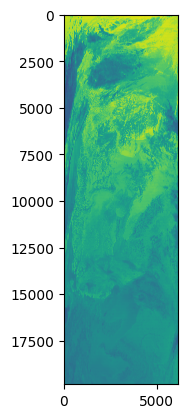

In [6]:
plt.imshow(dn_11_lines)

In [7]:
obama.transport_blocks[1].metadata.__dict__

{'frame_count': 5649289,
 'day_count': datetime.date(2024, 3, 6),
 'time_interval': 490310,
 'time_count': 27639,
 'cal_signal_dn': array([106, 111, 180, 114,  83], dtype=uint16),
 'bracket_calibrator_temp_dn': array([813, 809], dtype=uint16),
 'voc_temp_dn': np.uint16(621),
 'cool_temp_voltage_dn': array([ 128, 1002,    2], dtype=uint16),
 'instrument_status_records': array([  84, 1825,   97], dtype=uint16),
 'status_telemetry': array([  0, 773], dtype=uint16),
 'k_mirror_motor_temp_dn': array([773, 797, 784, 790], dtype=uint16),
 'main_mirror_temp_dn': np.uint16(804),
 'refl_mirror_temp_dn': np.uint16(808),
 'vis_detector_temp_dn': np.uint16(865),
 'near_ir_detector_temp_dn': np.uint16(762),
 'swir_drv_temp_dn': np.uint16(816),
 'vis_drv_temp_dn': np.uint16(764),
 'ir_drv_temp_dn': array([731, 740], dtype=uint16),
 'obs_mode_voc': array([0, 0, 0], dtype=uint16),
 'bb_temp_cnt': array([762, 749, 831, 765, 739, 843, 771], dtype=uint16),
 'scans_type': np.uint16(1),
 'obs_mode': (np.uin

In [8]:
converter = Hdf5Converter()

with h5py.File('test.HDF', 'w') as f1:
    converter.convert(obama, f1)